## Sections
* Math Fundamentals
    * Theorems and Approximations
    * Permutations
    * Mean Functions
* Random Walk Processes
* Brownian Motion
* Geometric Brownian Motion
* Itô's Lemma

---

## Math Fundamentals


### Theorems and Approximations

$(1-x) \approx e^{-x}$

---


### Combinatorics and Permutations

**Combinatorics** = the number of combinations of $R$ distinct objects we can make from a set of $N$ objects.

$$C_N = \frac{N!}{R! \cdot (N-R)!}$$

* Note that if we are choosing all $N$ objects such as the number of combinations of the numbers 1-5 then the equation simplifies to: $C_N = N!$
*   Note that this is the same as the permutations equation when choosing all $N$ objects.

**Permutations** = the number of ways we can arrange $R$ distinct objects out of a set of $N$ objects (order matters).
$$P_R = \frac{N!}{(N-R)!}$$

---

### Mean Functions

**Arithmetic Mean** = the sum of all values divided by the number of values.
$$\mu = \frac{1}{n} \sum_{i=1}^{n} x_i$$

**Geometric Mean** = the $n$ th root of the product of all values.
* Used when finding the mean of data measured with different units.
$$\mu = (\prod_{i=1}^{n} x_i)^{\frac{1}{n}}$$

**Harmonic Mean** = the reciprocal of the arithmetic mean of the reciprocals of all values.
* Use to calculate F1 score
$$\mu = (\frac{1}{n} \cdot \sum_{i=1}^{n} \frac{1}{x_i})^{-1}$$

In [1]:
import random
import numpy as np

# Generate 100 random positive numbers and put in an np array.
x = np.array([random.random() for i in range(100)])

# Mean function.
def mean(x):
    return sum(x) / len(x)

# Geometric mean function.
def gmean(x):
    return np.prod(x) ** (1 / len(x))

# Harmonic mean function.
def hmean(x):
    return ((1 / len(x)) * sum(1 / x))**(-1)

# Calculate mean with various functions.
print(mean(x))
print(gmean(x))
print(hmean(x))


0.442517398412476
0.2967725626497203
0.083904149271028


---

## Random Walk Processes
* Describes a path of successive random steps in a mathematical space.
* Simple example: an integer on the number line which starts at 0 and at each step moves +1 or -1 with equal probability.
    * The expected value of this random walk is 0, however, this random walk will cross any boundary line an infinite number of times if allowed to continue walking forever. This is known as the *level crossing phenomenon* or *gambler's ruin* as a gambler will at some point reach 0 and lose.
    * The sum of this series gives the net distance walked.
    * If $a$ and $b$ are positive integers, the expected number of steps until a one-dimensional simple random walk starting at 0 hits $b$ or $-a$ is $ab$.
    * The probability that the walk will hit $b$ before $-a$ is $\frac{a}{a+b}$
    * These above formulas can be derived from the fact that a simple random walk is a martingale.

#### Martingales
* Martingales are stochastic processes that meet the following criteria:
$$\mathbb{E}(X_n) < \infty$$
$$\mathbb{E}(X_{n+1} | X_1, ..., X_n) = X_n$$
* The expected next value, conditional on all past observations, is equal to the most recent observation.
* An unbiased random walk in any number of dimensions is an example of a martingale.
* A gambler's fortune is a martingale if all the betting games which the gambler plays are fair. To be more specific: suppose $X_n$ is a gambler's fortune after $n$ tosses of a fair coin, where the gambler wins 1 dollar if the coin comes up heads and loses 1 dollar if it comes up tails. The gambler's conditional expected fortune after the next trial, given the history, is equal to their present fortune. 


In [7]:
import numpy as np

# Generate a random walk based on a starting position x and a number of steps.
def random_walk(x = 0, n_steps = 100):

    # Vector to hold random walk path.
    w = np.ones(n_steps) * x

    # Generate random walk.
    for i in range(1, n_steps):
        yi = np.random.choice([1, -1]) # Choose between 1 step left or 1 step right.
        w[i] = w[i-1] + yi

    return w

rw_process = random_walk(0, 100)

# Testing that with a sufficient number of steps you can achieve large values
# in a simple random walk process.
rw_process = random_walk(0, int(1e5))
print("Max value in the random walk process with 1e5 steps: " + str(np.max(rw_process)))
print("Min value in the random walk process with 1e5 steps: " + str(np.min(rw_process)))


Max value in the random walk process with 1e5 steps: 171.0
Min value in the random walk process with 1e5 steps: -654.0


---

## Brownian Motion 
* The Wiener Process is the underlying stochastic process, Brownian motion is the phenomenon being modeled.
    * Diffusion Equation = Parabolic partial differential equation used in Brownian motion, Markov processes, random walks, et cetera.

#### Wiener Process
* The Wiener Process is a real valued continuous time stochastic process.
* A Wiener Process follows a normal distribution with $\mu=0$ and $\sigma^2=t$, and an expectation of $E[W_t] = 0$.
* A Wiener Process is characterized by four tenets: 
    * $W_0 = 0$
    * $W_t$ is continuous
    * $W_t$ has independent increments
    * $W_t - W_s ~ \sim N(0,t-s)$
* The Lévy characterisation states that a Wiener process is a continuous martingale.
* Levy Processes are stochastic processes with independent and stationary increments. The Wiener Process is the most well known Levy Process.
* The Wiener Process is a Markov Process, meaning that the future is independent of the past given the present.
    * Information of past states does not help predict future states, only the current state is relevant.

In [8]:
import numpy as np

n = 25 # Number of time steps in the Wiener Process.
T = 1 # Total time horizon (i.e 1 year).
dt = T/n # Incremental time step (t).

mu = 0 
sigma = np.sqrt(dt)

# Wiener Process with (n=25) time steps.
np.random.normal(mu, sigma, size = n)

# Verifying that the expected value of the Wiener Process = 0.
n = 10000
wp = np.random.normal(mu, sigma, size = n)
print("Average value of the Wiener Process with 10000 Steps: " + str(np.mean(wp)))

Average value of the Wiener Process with 10000 Steps: 0.0029889033676849634


#### Brownian Motion
* Brownian motion = the random motion of particles suspended in a fluid (liquid or gas).
    * Caused by the continuous and rapid collisions between the particles and surrounding molecules in the fluid.
* Under Brownian motion there is no preferential direction of flow and over time the particles motion tends toward a dynamic equilibrium where overall movement appears balanced even though individual motions are random.

#### Einstein's Theory
* Formulation of a diffusion equation for Brownian particles in which the diffusion coefficient is related to the mean squared displacement of the particles.
    * This requires determining how far a Brownian particle travels in a given time interval. Classical mechanics cannot determine this because of the massive number of bombardments a Brownian particle undergoes, $10^{14}$ collisions per second. 
    * Instead a probability density function is used to estimate how likely the particle is to jump a distance $x + \Delta$.
* Using this framework, the density of Brownian particles $\rho$ at point $x$ at time $t$ satisfied the diffusion equation, where D is interpreted as the mass diffusivity coefficient (how quickly diffusion occurs):
$$\frac{\partial \rho}{\partial t} = D \cdot \frac{\partial^2 \rho}{\partial x^2}$$

* Assuming that $N$ particles start from the origin at $t=0$, the above diffusion equation has the solution:
$$\rho(x, t) = \frac{N}{\sqrt{4 \pi Dt}}e^{-\frac{x^2}{4Dt}}$$

* Note, typically a compound's diffusion coefficient is ~10,000x greater in air than in water. 
* C02 in air has a diffusion coefficient of $16 mm^2/s$.

In [4]:
# Density of Brownian particles p at a point x and time t, conditional on the 
# number of particles N that start at the origin and the diffusion coefficient
# of the compound D.
import math

def p(x, t, N, D):
    return N / (math.sqrt(4 * math.pi * D * t)) * math.exp(-x**2 / (4 * D * t))

# Finding the density at the origin (x=0) after one time step, assuming 1000 
# starting particles and a diffusion coefficient of 16.
x = 0
t = 1
N = 1000
D = 16

density = p(x, t, N, D)
print("Baseline Density: " + str(density))

# Moving 10 steps away from the origin, all else held equal the density of 
# particles decreases drastically.
x = 10
t = 1
N = 1000
D = 16

density = p(x, t, N, D)
print("Density 10 Steps Away: " + str(density))

# Increasing the number of time steps that pass before measuring the density
# at the origin, all else held equal the density of particles decreases.
x = 0
t = 5
N = 1000
D = 16

density = p(x, t, N, D)
print("Density After 5 Time Steps: " + str(density))

# Doubling the diffusion coefficient, all else held equal the density of
# particles decreases.
x = 0
t = 1
N = 1000
D = 32

density = p(x, t, N, D)
print("Density w/ Larger Diffusion Coefficient: " + str(density))


Baseline Density: 70.52369794346954
Density 10 Steps Away: 14.782570152955675
Density After 5 Time Steps: 31.539156525252
Density w/ Larger Diffusion Coefficient: 49.86778505017909


* The diffusion equation above it a normal distribution with $\mu = 0$ and variance $\sigma^2 = 2Dt$.
* The first moment of this distribution vanishes, meaning that a Brownian particle is equally likely to move left or right.
* The second moment ($\sigma^2 = 2Dt$) is not vanishing and explains how much the particle moves (mean squared displacement) in terms of time $t$ and the diffusion coefficent $D$ (how quickly the compound tends to diffuse).

---

## Geometric Brownian Motion
* Continuous-time stochastic process in which the log of the randomly varying quantity follows a Brownian motion with drift.
* A stochastic process $S_t$ follow Geometric Brownian Motion (GBM) if it satisfies the following stochastic differential equation (SDE):
$$dS_t = \mu S_t dt + \sigma S_t dW_t$$
* Where $S_t$ is the underlying process being modeled, $W_t$ is a Wiener Process/Brownian Motion, $\mu$ is the percentage drift constant and $\sigma$ is the percentage volatility constant.
    * $\mu$ represents a long-run deterministic trend and $\sigma$ represents the random shocks to the trend.
* Using Itô's calculus the above SDE has the solution: 
$$S_t = S_0 e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_t}$$
* The solution $S_t$ is a log-normally distributed random variable with expected value and variance given by:
$$E[S_t] = S_0 e^{\mu t}$$
$$Var[S_t] = S_0^2 e^{2\mu t} (e^{\sigma^2 t} - 1)$$
* The expected value can be thought of as simply taking the original value and growing it at a constant rate $\mu$ for an amount of time $t$.

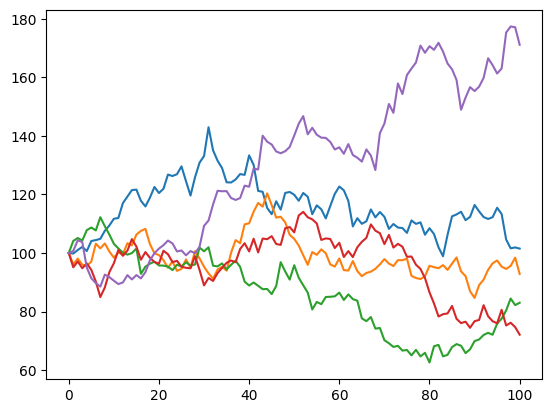

Expected value at time step 100 with 1000 simulations: 149.18246976412703
Realized average value at time step 100 with 1000 simulations: 145.90659892891796
Expected variance with 1000 simulations: 9643.923476237169
Realized variance with 1000 simulations: 7774.560716526783


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 0.1 # Drift coefficient mu.
sigma = 0.3 # Volatility.
n = 100 # Number of time steps.
T = 1 # Total time horizon (1 year).
M = 5 # Number of simulations.
S0 = 100 # Initial value.

# Calculate the size of each time step.
dt = T/n

# Generating Brownian motion (Wiener Process), thus we use a normal distribution
# with mu = 0 and sigma^2 = dt.
Wt = np.random.normal(0, np.sqrt(dt), size=(M,n))

# Entire part of the GBM equation after S0 (movement at each time step).
St = np.exp( # Euler's number.
    (mu - sigma ** 2 / 2) * dt # Drift term. 
    + sigma * Wt.T # Wiener Process (Diffusion Term) * Sigma
)

# Include array of 1's.
St = np.vstack([np.ones(M), St])

# Use cumulative product to multiply the beginning value S0 by the movement at
# each time step for a given simulation. This returns the GBM path.
St = S0 * St.cumprod(axis=0)

# Plot the GBM path for each simulation.
plt.plot(St)
plt.show()

#-------------------------------------------------------------------------------
# Verifying that under a large number of simulations the expected value and 
# variance of the GBM is close to theoretical values.
#-------------------------------------------------------------------------------

M = 1000
T = 4
dt = T/n

# Generate 1000 GBM paths.
St = np.exp((mu - sigma ** 2 / 2) * dt + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T)
St = np.vstack([np.ones(M), St])
St = S0 * St.cumprod(axis=0)

# Taking the mean value of all simulations at time step = 100 and comparing to 
# the expected value of the GBM.
print("Expected value at time step 100 with 1000 simulations: " + str(S0 * np.exp(mu * T)))
print("Realized average value at time step 100 with 1000 simulations: " + str(np.mean(St[100, ])))

# Taking the variance of all simulations at time step = 100 and comparing to
# the variance of the GBM.
print("Expected variance: " + str(S0 ** 2 * np.exp(2 * mu * T) * (np.exp(sigma ** 2 * T) - 1)))
print("Realized variance: " + str(np.var(St[100, ])))


---

## Itô's Lemma

#### Itô's Calculus
* Itô calculus extends the methods of calculus to stochastic processes such as Brownian motion.
* The central concept is the Itô integral, a stochastic version of the Riemann–Stieltjes integral (the standard integral method).
* In the central concept of Itô's calculus the integrands and integrators are stohchastic processes:
$$Y_t = \int_0^t H_s dX_s$$
* Where $H$ is an integrable process of Brownian motion (more generally, a semimartingale). The result of the above integration is another stochastic process $Y$.
    * Another way to put it is that the integral from $0$ to $t$ is a random variable defined as a limit of a certain sequence of random variables.
* Itô stochastic integral is an integral with respect to a function which is not differentiable at any point and has infinite variation over every time interval (stochastic). 
* To perform Itô's calculus, one chooses a sequence of partitions of the interval from $0$ to $t$ and constructs Riemann sums. Every time we are computing a Riemann sum, we are using a particular instantiation of the integrator. The limit then is taken in probability as the mesh of the partition is going to zero. 
* In quantitative finance, the integrand represents $H_s$ how much of the asset one holds, the integrator represents the movement of the price, and the integral is how much money the asset is worth at any given time $t$. 
    * The Itô stochastic integral represents the payoff of a continuous time trading strategy consisting of holdings $H_t$ of the asset at time $t$.

#### Itô's Lemma

* Itô's Lemma is an identity that serves as the functional equivalent of the chain rule for stochastic calculus.
* Given an Itô Process that takes the following form, where $W_t$ is a Wiener process (Brownian motion):
$$dX_t = \mu X_t dt + \sigma X_t dW_t$$
* Itô's Lemma in its simplest form states that for any twice continuously differentiable function $f$ on the real number line and any Itô Process $X_t$ (as defined above), the function $f(X)$ is itself an Itô Process with the following form:
$$df(X_t) = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial X} dX_t + \frac{1}{2} \frac{\partial^2 f}{\partial dX_t^2} (dX_t)^2$$
* This can be further simplified to the form:
$$df(X_t) = f'(X_t)dX_t + \frac{1}{2}f''(X_t)dX_t^2$$
* Itô's Lemma gives a useful tool for solving stochastic differential equations (SDEs).

#### Solving the Geometric Brownian Motion (GBM) SDE using Itô's Lemma

* Recall that a GBM stochastic process is defined using the following stochastic differential equation:
$$dS_t = \mu S_t dt + \sigma S_t dW_t$$

* Logging all instances of the stochastic process $S_t$ we get:
$$d(lnS_t) = \mu(ln S_t)dt + \sigma(ln S_t)dW_t$$




* And applying the simplified form of Itô's Lemma above with $f(S_t)$ as $ln(x)$ we get:
$$d(lnS_t) = (lnS_t)'dS_t + \frac{1}{2}(lnS_t)''dS_tdS_t$$
* Given that the first derivative of $ln(X)$ is $\frac{1}{X}$ and the second derivative is $-\frac{1}{X^2}$, we get:
$$d(lnS_t) = \frac{1}{S_t}dS_t - \frac{1}{2}\frac{1}{S_t^2}dS_tdS_t$$
* Where $dS_tdS_t$ is the quadratic variation of the original SDE defined in the first step and can be multiplied out to equal:
$$dS_tdS_t = \sigma^2 S^2_tdW^2_t + 2\sigma S^2_t\mu dW_t dt + \mu^2 S^2_t dt^2$$
* We are solving the SDE for an initial value $S_0$ so we care about when $dt \rightarrow 0$, $dt$ (a small increment of time) converges to 0 faster than $dW_t$ since a small increment of the Wiener Process $W_t$ equals $dW^2_t = O(dt)$. Thus we can get rid of the first two terms in the above equation and we are left with:
$$dS_tdS_t = \mu^2 S^2_t dt^2$$
* Plugging in $dS_t = \mu S_t dt + \sigma S_t dW_t$ for all values of $dS_t$ and performing a lot of simplication we get:
$$ln\frac{S_t}{S_0} = (\mu - \frac{\sigma^2}{2})t + \sigma W_t$$
* By raising both sides to the power of $e$ we get and multiplying both sides by $S_0$ we get the analytics solution to the GBM SDE:
$$S_t = S_0e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_t}$$
* Itô's Lemma allows us to take the $ln$ of the GBM SDE and solve for $S_t$ in a much simpler way than the original SDE.

---